In [1]:
# 1. Importar Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Crear un Conjunto de Datos simulado con relación positiva fuerte
n=30
np.random.seed(42)  # Para reproducibilidad

tAmbiente = (np.random.uniform(-50, 50, n)).round(2)  #


# 2. Crear cEnergia con relación positiva fuerte (pendiente positiva y poco ruido)
ruido = np.round(np.random.normal(loc=0, scale=2, size=n),2)  # ruido pequeño
cEnergia = -2 * tAmbiente + 5 + ruido  # Y está fuertemente relacionada con X


# Crear DataFrame
df = pd.DataFrame({
    "Temperatura": tAmbiente,
    "Energia": cEnergia
})

# Mostrar DataFrame
print("Datos simulados:")
print(df)



Datos simulados:
    Temperatura  Energia
0        -12.55    27.80
1         45.07   -84.39
2         23.20   -42.60
3          9.87   -15.32
4        -34.40    72.60
5        -34.40    77.50
6        -44.19    93.35
7         36.62   -70.36
8         10.11   -13.57
9         20.81   -39.06
10       -47.94   101.30
11        46.99   -92.90
12        33.24   -64.14
13       -28.77    62.93
14       -31.82    70.12
15       -31.66    68.66
16       -19.58    43.93
17         2.48    -0.56
18        -6.81    15.66
19       -20.88    45.32
20        11.19   -18.30
21       -36.05    79.21
22       -20.79    47.27
23       -13.36    28.19
24        -4.39    14.43
25        28.52   -52.81
26       -30.03    63.71
27         1.42     3.38
28         9.24   -11.42
29       -45.35    97.56


In [3]:
#2. Implementación del Modelo de Regresión Lineal (3 puntos)
#● Utilizar la librería scikit-learn para ajustar un modelo de regresión lineal simple.
#● Obtener e imprimir los coeficientes de la regresión (intercepto y pendiente).


# X: variables predictoras
X = df[['Temperatura']]
y = df['Energia']

# Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener coeficientes

beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]

print(f"Coeficientes del modelo:")
print(f"- Intercepto (beta_0): {beta_0:.2f}")
print(f"- Pendiente (beta_1): {beta_1:.2f}")


Coeficientes del modelo:
- Intercepto (beta_0): 4.46
- Pendiente (beta_1): -2.03


In [4]:

# Predecir
y_pred = modelo.predict(X)

# Ahora puedes usar y_pred sin error
valores_predichos = np.round(y_pred,2).tolist()
print("Primeros 5 valores predichos:")
print(valores_predichos[:5])


Primeros 5 valores predichos:
[29.91, -86.93, -42.58, -15.55, 74.22]


In [5]:
y_true = df["Energia"]
y_pred = modelo.predict(X)
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"\nEvaluación del modelo:")
print(f"- Error Cuadrático Medio (MSE): {mse:.3f}")
print(f"- Error Absoluto Medio (MAE): {mae:.3f}")
print(f"- Coeficiente de Determinación (R²): {r2:.3f}")


Evaluación del modelo:
- Error Cuadrático Medio (MSE): 2.686
- Error Absoluto Medio (MAE): 1.298
- Coeficiente de Determinación (R²): 0.999


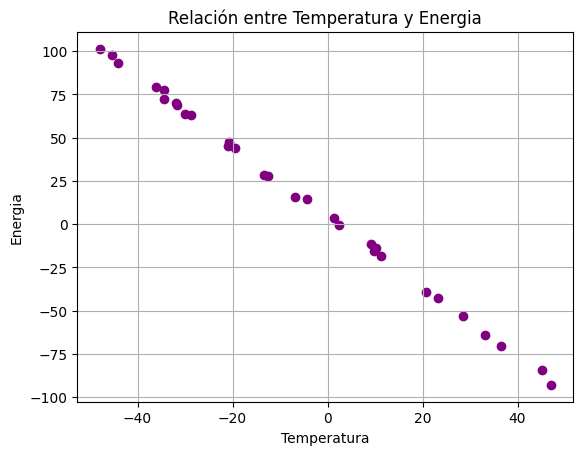

In [6]:
# 3. Visualizar los datos
plt.scatter(df["Temperatura"], df["Energia"], color='purple')
plt.xlabel("Temperatura")
plt.ylabel("Energia")
plt.title("Relación entre Temperatura y Energia")
plt.grid(True)
plt.show()

Por cada grado de Temperatura adicional, el consumo de Energia aumenta en 4.46 unidades.
Si la Temperatura es igual a 0 Grados, el cosumo de Energia es igual a -2.03 unidades.


El Error Absoluto Medio (MAE)= 1.298 indica que modelo se equivoca en ~1.3 unidades de Energia promedio, lo que es bastante aceptable.



El Coeficiente de Determinación (R²)= 0.999, indica que el modelo es acertado y explica el 99,9% de la variación en la variable objetivo.


